# Derived-term Automata for Extended Weighted Rational Expressions
This page is a complement to the submission to ICALP 2016.  It exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/ICALP2016.ipynb)
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/ICALP2016.ipynb), whose graphical rendering is always correct

More information about the various constructs are available here:
- [_expression_.derivation](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derivation.ipynb)
- [_expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [_expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)

Or see the [main documentation page of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/index.ipynb).

In [1]:
import vcsn

## Example $\mathsf{E}_3$: A Lex-like Scanner
### Example 6: Desugaring

We introduce the "context" (i.e., the automaton type) that corresponds to labels that are letters (`lal_char`) and weights that are rational numbers (`q`).

In [2]:
Q = vcsn.context('lal_char(ab), q')
Q

{ab} -> Q

Vcsn supports the `<+` operator.  It is desugared in a combination of conjuction and complement.

In [3]:
e3 = Q.expression('<2>(ab) <+ <3>[ab]{+}')
e3

<2>(ab)+(ab){c}&<3>((a+b)(a+b)*)

### Example 21: The Derived-Term Automaton
The expansion and the derived-term automaton of $\mathsf{E}_3$ follow.

In [4]:
e3.expansion()

a.[<2>b + <3>b{c}&(a+b)*] + b.[<3>(a+b)*]

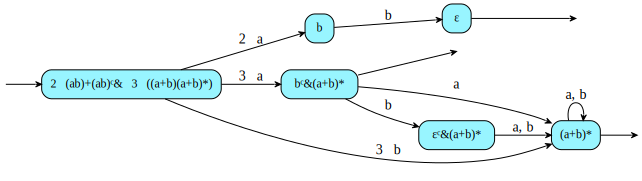

In [5]:
e3.derived_term()

## Example $\mathsf{E}_1$: A Simple Expression
### Examples 7 and 10: Polynomials and Derivatives

In [6]:
Z = vcsn.context('lal_char, z')
e1 = Z.expression('<5>\e + <2>ace + <6>bce + <4>ade + <3>bde')
e1

<5>\e+<2>(ace)+<4>(ade)+<6>(bce)+<3>(bde)

The derivatives of $\mathsf{E}_1$ with respect to $a$ and $b$ are the following polynomials.

In [7]:
e1.derivation('a')

<2>ce + <4>de

In [8]:
e1.derivation('b')

<6>ce + <3>de

The expansion of $\mathsf{E}_1$ is as follows.  The notation is slightly different from the paper, where for higher clarity the weights in the polynomials are separated from the expressions by a $\otimes$.  In the implementation, since the weight is always displayed, this separation is useless, and not put, for conciseness.

In [9]:
e1.expansion()

<5> + a.[<2>ce + <4>de] + b.[<6>ce + <3>de]

### Example 18: The Derived-Term Automaton
The derived-term automaton can be computed using derivations or expansions.

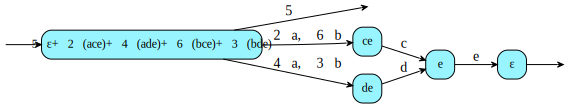

In [10]:
e1.derived_term('expansion')

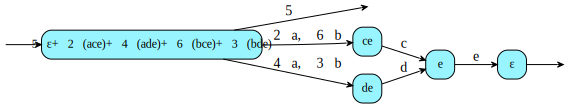

In [11]:
e1.derived_term('derivation')

### Example 20: The Deterministic Derived-Term Automaton

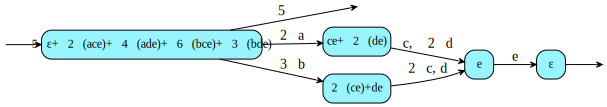

In [12]:
e1.derived_term(deterministic=True)

## Section 4.1: An Infinite Automaton
There exist no finite weighted _deterministic_ automaton for the following expression.

In [13]:
e = Q.expression('a* + (<2>a)*')
e

a*+(<2>a)*

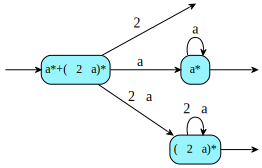

In [14]:
e.derived_term()

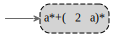

In [15]:
a = e.derived_term(deterministic=True, lazy=True)
a

Repeated evaluations uncover parts of this automaton.

2


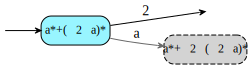

In [16]:
print(a('')); a

5


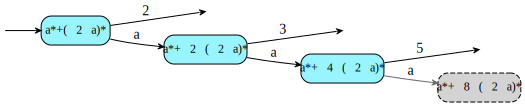

In [17]:
print(a('aa')); a

17


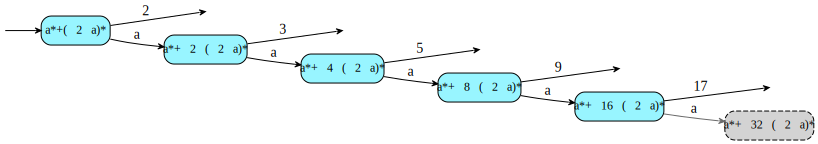

In [18]:
print(a('aaaa')); a